# Model Building

1. Train-test split

2. Multiple Linear Regression

3. Lasso Regression

4. Random Forest Regression

5. Gradient Boosting Regression

6. Bagging Regression

7. Tune models using GridsearchCV

8. Test Ensembles


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('jobs_keyword.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'company', 'job_title',
       'listing_id', 'address', 'employment_type', 'seniority', 'min_exp',
       'job_cat', 'salary_range', 'salary_unit', 'date_posted', 'date_expiry',
       'job_description', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len'],
      dtype='object')

In [7]:
df_model = df[['job_title', 'employment_type', 'seniority', 'min_exp', 'job_cat', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len']]

In [9]:
df_model.head()

,job_title,employment_type,seniority,min_exp,job_cat,avg_salary,aws,python,sql,r,tableau,excel,powerbi,spark,hadoop,tensorflow,job_desc_len
0,analyst,full time,Junior Executive,2,information technology,6750.0,0,1,1,1,1,0,0,0,0,0,1626
1,analyst,full time,Senior Executive,6,information technology,7900.0,1,1,1,0,0,0,1,0,1,0,1175
2,analyst,full time,Senior Executive,2,others,5750.0,0,0,0,0,0,1,0,0,0,0,2590
3,analyst,full time,Senior Executive,3,information technology,7500.0,0,1,1,0,1,1,1,0,0,0,2416
4,analyst,full time,Manager,5,banking and finance,12000.0,0,1,1,1,1,0,1,0,0,0,1790


In [10]:
df_dum = pd.get_dummies(df_model)

In [12]:
df_dum.columns

Index(['min_exp', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len',
       'job_title_analyst', 'job_title_consultant',
       'job_title_data management', 'job_title_data scientist',
       'job_title_developer', 'job_title_engineer', 'job_title_manager',
       'job_title_others', 'job_title_trainee', 'employment_type_contract',
       'employment_type_flexi-work', 'employment_type_full time',
       'employment_type_internship/traineeship', 'employment_type_temporary',
       'seniority_Executive', 'seniority_Fresh/entry level',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Middle Management', 'seniority_Non-executive',
       'seniority_Professional', 'seniority_Senior Executive',
       'seniority_Senior Management',
       'job_cat_accounting / auditing / taxation',
       'job_cat_admin / secretarial', 'job_cat_advertising / media',
       'job_cat_banking and finance', 

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
import statsmodels.api as sm


In [20]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     12.52
Date:                Sat, 29 May 2021   Prob (F-statistic):           2.21e-44
Time:                        15:14:55   Log-Likelihood:                -2550.4
No. Observations:                 294   AIC:                             5205.
Df Residuals:                     242   BIC:                             5396.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     2899.7465    400.764      7.236      0.000    2110.315    3689.178
min_exp                                    631.7870     61.705     10.239      0.000     510.240     753.334
aws                                        722.4221    346.754      2.083      0.038      39.381    1405.463
python                                     160.1511    248.775      0.644      0.520    -329.890     650.193
sql                                        -38.4930    255.193     -0.151      0.880    -541.176     464.190
r                                          193.7101    284.419      0.681      0.496    -366.543     753.963
tableau                                   -204.5274    241.263     -0.848      0.397    -679.770     270.715
excel                                     -849.0332    214.765     -3.953      0.000   -1272.080    -425.986
powerbi                                    313.5862    331.567      0.946      0.345    -339.539     966.711
spark                                      158.0389    459.491      0.344      0.731    -747.074    1063.152
hadoop                                     382.6001    464.757      0.823      0.411    -532.886    1298.086
tensorflow                                 544.9091    820.380      0.664      0.507   -1071.087    2160.906
job_desc_len                                 0.0944      0.092      1.026      0.306      -0.087       0.276
job_title_analyst                          225.7498    295.490      0.764      0.446    -356.311     807.811
job_title_consultant                      1749.3017    907.678      1.927      0.055     -38.657    3537.260
job_title_data management                  301.8156   1480.207      0.204      0.839   -2613.918    3217.549
job_title_data scientist                  2471.0621    547.514      4.513      0.000    1392.560    3549.564
job_title_developer                        178.6842    717.698      0.249      0.804   -1235.048    1592.416
job_title_engineer                        -185.7084    465.574     -0.399      0.690   -1102.803     731.386
job_title_manager                           -3.3797    828.212     -0.004      0.997   -1634.805    1628.045
job_title_others                         -1268.8534    610.080     -2.080      0.039   -2470.598     -67.109
job_title_trainee                         -568.9254   1080.092     -0.527      0.599   -2696.507    1558.656
employment_type_contract                  1266.9183    372.139      3.404      0.001     533.874    1999.963
employment_type_flexi-work                1718.8026    972.952      1.767      0.079    -197.733    3635.338
employment_type_full time                  526.4526    296.915      1.773      0.077     -58.415    1111.320
employment_type_internship/trai

In [21]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-1229.2336368284102

In [25]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-1224.3846484820197

C:\Users\edmun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635878.6643087268, tolerance: 91429.41842893836
  model = cd_fast.enet_coordinate_descent(


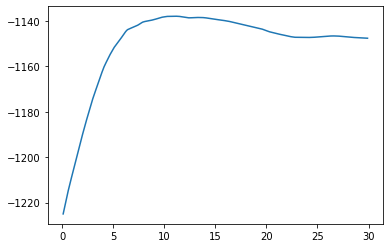

In [30]:
alpha = []
error = []

for i in range(1,300):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [31]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
111,11.2,-1137.938204


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1222.2081065654695

In [101]:
#Using GridSearchCV to locate best parameters for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs_rf = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_rf.fit(X_train,y_train)


RandomForestRegressor(criterion='mae', n_estimators=60)

In [103]:
print(gs_rf.best_score_)
print(gs_rf.best_estimator_)

-1182.3374573203341

In [73]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
np.mean(cross_val_score(gb,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-1239.2675049307172

In [98]:
#Using GridSearchCV to locate best parameters for Gradient Boosting
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'loss':('lad',), 'max_features':('auto','sqrt','log2')}

gs_gb = GridSearchCV(gb,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_gb.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'loss': ('lad',),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [99]:
print(gs_gb.best_score_)
print(gs_gb.best_estimator_)

-1142.339618311585
GradientBoostingRegressor(loss='lad', max_features='auto', n_estimators=240,
                          random_state=0)


In [83]:
#Bagging
from sklearn.ensemble import BaggingRegressor

bc = BaggingRegressor(n_estimators=10, random_state=0)
bc.fit(X_train, y_train)
np.mean(cross_val_score(bc,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1278.3514593360483

In [107]:
#Using GridSearchCV to locate best parameters for Bagging Classifier
parameters = {'n_estimators':range(10,300,10),  'bootstrap': [True, False], 'bootstrap_features': [True, False]}

gs_bc = GridSearchCV(bc,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_bc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BaggingRegressor(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [109]:
print(gs_bc.best_score_)
print(gs_bc.best_estimator_)

-1185.7741159142731
BaggingRegressor(bootstrap_features=True, n_estimators=290, random_state=0)


In [38]:
tpred_lm = lm.predict(X_test)
tpred_lm

array([ 6016.73669553, 10340.14083878,  2468.76857068,  4545.96029862,
        5489.08639933,  1278.97703036,  6863.18694882,  8426.21286459,
        8399.50013242,  9219.55980982,  8095.05331281,  5209.02394864,
        5466.99211928,  5275.83051054,  4545.96029862,  4466.15789036,
        6375.33548789,  1567.36195117,  6790.13082459,  3508.42393645,
        5529.70856255,  3879.47935691,  2468.76857068,  6004.29097111,
        9736.10830558,  5998.54396357,  7707.00093115, 10232.46557763,
        6382.43778771,  8962.66503152,  7333.29896853,  4212.52491846,
        7655.42515228,  5794.70965029,  5272.78619761,  4921.52932604,
        4131.48290417,  2336.07922983,  6883.28504401,  5814.82742521,
        4383.91337057, 10097.83310556,  8218.13808378,  8108.23759988,
        9194.09608824,  7642.23493422,  5255.70644411,  4799.27398575,
        3595.80238368,  4880.40237205,  4212.52491846,  8218.13808378,
        7173.99474792,  6515.17504317,  6480.56090617,  5852.09028592,
      

In [39]:
tpred_lml = lm_l.predict(X_test)
tpred_lml

array([ 6022.6897708 , 10350.06735099,  2467.17106545,  4546.00308454,
        5493.7519244 ,  1288.90444576,  6870.41199073,  8439.18758724,
        8391.00511941,  9208.25270623,  8093.26757738,  5164.13409879,
        5460.43869074,  5281.47017401,  4546.00308454,  4454.89817132,
        6375.66620886,  1632.7195402 ,  6806.18290041,  3506.23735776,
        5527.94938212,  3871.97890071,  2467.17106545,  6011.14542492,
        9707.0472229 ,  6002.55481043,  7699.93647479, 10208.7339691 ,
        6375.453607  ,  8958.48841168,  7328.6694712 ,  4212.05274311,
        7647.82599667,  5793.30608912,  5227.78254128,  4925.17192462,
        4118.26864725,  2334.60749726,  6887.64861269,  5813.79641182,
        4395.29444456, 10091.78096656,  8219.78983533,  8102.07394453,
        9183.16255064,  7634.82471845,  5249.12094542,  4806.09988262,
        3599.0987722 ,  4878.45048241,  4212.05274311,  8219.78983533,
        7177.40913838,  6517.15479339,  6481.16114232,  5847.89035439,
      

In [40]:

tpred_rf = gs_rf.best_estimator_.predict(X_test)
tpred_rf

array([ 5996.73913043,  9349.34782609,  2691.31521739,  6731.95652174,
        5776.7826087 ,  2571.26086957,  7811.65217391,  7853.80434783,
        8146.19565217,  8439.7826087 ,  7569.89130435,  5707.06521739,
        5419.2173913 ,  5194.7173913 ,  6731.95652174,  4444.02173913,
        6532.39130435,  4820.32608696,  6693.69565217,  3731.38043478,
        5165.2173913 ,  3367.95652174,  2691.31521739,  6389.65217391,
        8133.60869565,  5650.97826087,  7436.95652174,  9376.84782609,
        6587.93478261,  8336.95652174,  5702.82608696,  4605.52173913,
        6712.17391304,  5572.82608696,  5818.58695652,  4562.39130435,
        4027.09782609,  2818.91304348,  6833.80434783,  5618.30434783,
        5724.        ,  8210.76086957,  6864.82608696,  7063.15217391,
        9064.02173913,  6855.43478261,  4383.60869565,  5167.39130435,
        4941.93478261,  4109.45652174,  4605.52173913,  6864.82608696,
        7311.73913043,  6755.        ,  6546.08695652,  4997.73913043,
      

In [111]:
tpred_gb = gs_gb.best_estimator_.predict(X_test)
tpred_gb

array([ 6699.37749436, 10205.09929069,  2108.66511643,  5651.86912334,
        6106.39435561,  2120.90904111,  7463.64261414,  8678.9830083 ,
        6664.69211695,  7196.10148067,  6527.1495214 ,  5464.69096619,
        4581.06074401,  4558.84443323,  5651.86912334,  2969.19722647,
        6788.90606561,  4486.31485734,  7261.11875464,  3360.05730036,
        4293.10763201,  3763.09406151,  2108.66511643,  6206.89993778,
        6839.08209839,  5324.37706794,  7633.26638839, 10339.72437638,
        5457.65752782,  8364.40586978,  6231.27132632,  4268.74488002,
        4631.71913554,  5158.87185046,  5461.59336099,  4445.45005757,
        4601.87949313,  3182.81635104,  6737.84759562,  5642.76147897,
        4985.16616892,  8382.16950102,  6842.54807206,  6404.206691  ,
        7424.36755886,  6871.50737557,  4193.79838095,  5757.95727917,
        3885.6454626 ,  4185.1581457 ,  4268.74488002,  6842.54807206,
        6834.15324423,  7058.40545732,  6780.53592962,  5183.33287999,
      

In [112]:
tpred_bc = gs_bc.best_estimator_.predict(X_test)
tpred_bc

array([ 6434.64778325,  9871.50862069,  2565.48121921,  6055.00287356,
        5880.35153257,  2631.40995484,  7850.87602627,  8721.59277504,
        7873.17049808,  9067.4137931 ,  7866.02011494,  5677.75862069,
        5408.82060755,  4475.64655172,  6055.00287356,  3972.2179803 ,
        6766.62931034,  4867.19376026,  6531.4819376 ,  3436.9454023 ,
        4972.29885057,  3432.73563218,  2565.48121921,  6147.7865353 ,
        7525.27298851,  5959.1277327 ,  7016.90948276, 10089.85837438,
        6953.17200328,  8480.79022989,  5758.05931856,  4644.94106899,
        6001.38649425,  5792.27873563,  5972.84482759,  4433.81321839,
        4298.7183908 ,  2936.77791461,  6675.05353918,  5458.48515326,
        5775.59031199,  9531.6954023 ,  6913.18390805,  7165.28872469,
        9283.54885057,  6885.27969349,  4384.92528736,  4983.82681906,
        4396.8908046 ,  4341.49952107,  4644.94106899,  6913.18390805,
        6969.44745484,  6613.0681445 ,  6819.95011789,  5227.3591954 ,
      

In [113]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))
print(mean_absolute_error(y_test,tpred_gb))
print(mean_absolute_error(y_test,tpred_bc))
print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

1415.730761040994
1414.6088468143355
1326.6101645123383
1434.8165377536004
1362.1875779944112
1300.8470770412684


In [86]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[10,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2156,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]